# Transformación de los datos
___________________

## Importaciones

In [1]:
import os
os.chdir('..') # Modifico a una carpeta hacia atras
os.listdir() # Compruebo viendo que estan las carpetas dentro de src

['catboost_info',
 'data',
 'memoria.ipynb',
 'modelo_smote.pkl',
 'modelo_smote_xgb.pkl',
 'modelo_under.pkl',
 'modelo_wouimb.pkl',
 'notebooks',
 'utils']

In [2]:
# Importacion de utils
from utils.funcions import *
from utils.modulos import *
import utils.toolbox_ML as tb
import utils.bootcampviztools as bt

## Carga de datos mapeados

In [3]:
print("Ruta actual:", os.getcwd())
os.listdir()
os.chdir('src')
os.listdir()

Ruta actual: c:\Users\sorim\BOOTCAMP_EJERCICIOS\Proyectos\ML_final


['catboost_info',
 'data',
 'memoria.ipynb',
 'modelo_smote.pkl',
 'modelo_smote_xgb.pkl',
 'modelo_under.pkl',
 'modelo_wouimb.pkl',
 'notebooks',
 'utils']

In [4]:
df_map = pd.read_csv('./data/processed/dataset_mapeado.csv')
df_map.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,Single,2nd phase—general contingent,5,Animation and Multimedia Design,1,Secondary education,Portuguese,General commerce course,Other—11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,1,Secondary education,Portuguese,Secondary Education—12th Year of Schooling or ...,Higher Education—degree,Intermediate Level Technicians and Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase—general contingent,5,Communication Design,1,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase—general contingent,2,Journalism and Communication,1,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),0,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   object 
 6   Nacionality                                     4424 non-null   object 
 7   Mother's qualification                          4424 non-null   object 
 8   Father's qualification                          4424 non-null   object 
 9   Mother's occupation                      

In [6]:
# Instancio las variables numéricas y categóricas
var_num = [col for col in df_map.select_dtypes(include=['number']).columns if df_map[col].nunique() > 2]
var_cat = [col for col in df_map.columns if col not in var_num and col != 'Target']

In [7]:
print('Variables numéricas -->', var_num)
print('Variables categóricas -->', var_cat)

Variables numéricas --> ['Application order', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Variables categóricas --> ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']


## Separación de **Train**, **Validación** y **Test**

Voy a separar en 3 partes:
- **Train**: 80% de los datos
- **Validación**: 10% de los datos
- **Test**: 10% de los datos

In [8]:
train_val_set, test_set = train_test_split(df_map, test_size=0.1, random_state=42)
train_set, val_set = train_test_split(train_val_set, test_size=0.1111, random_state=42) # He estado probando para que me saliese el mismo numero de datos para validacion y para test

In [9]:
print('Valores de Train -->', len(train_set))
print('Valores de Validación -->', len(val_set))
print('Valores de Test -->', len(test_set))

Valores de Train --> 3538
Valores de Validación --> 443
Valores de Test --> 443


In [10]:
# Guardo en un archivo .csv los diferentes sets
ruta_train = './data/processed/train_set.csv'
ruta_val = './data/processed/val_set.csv'
ruta_test = './data/processed/test_set.csv'

train_set.to_csv(ruta_train, index=False)
val_set.to_csv(ruta_val, index=False)
test_set.to_csv(ruta_test, index=False)

### Creación parejas X,y

In [11]:
X_train = train_set.drop('Target', axis=1)
y_train = train_set['Target']

X_val = val_set.drop('Target', axis=1)
y_val = val_set['Target']

X_test = test_set.drop('Target', axis=1)
y_test = test_set['Target']

## Análisis del **Target**

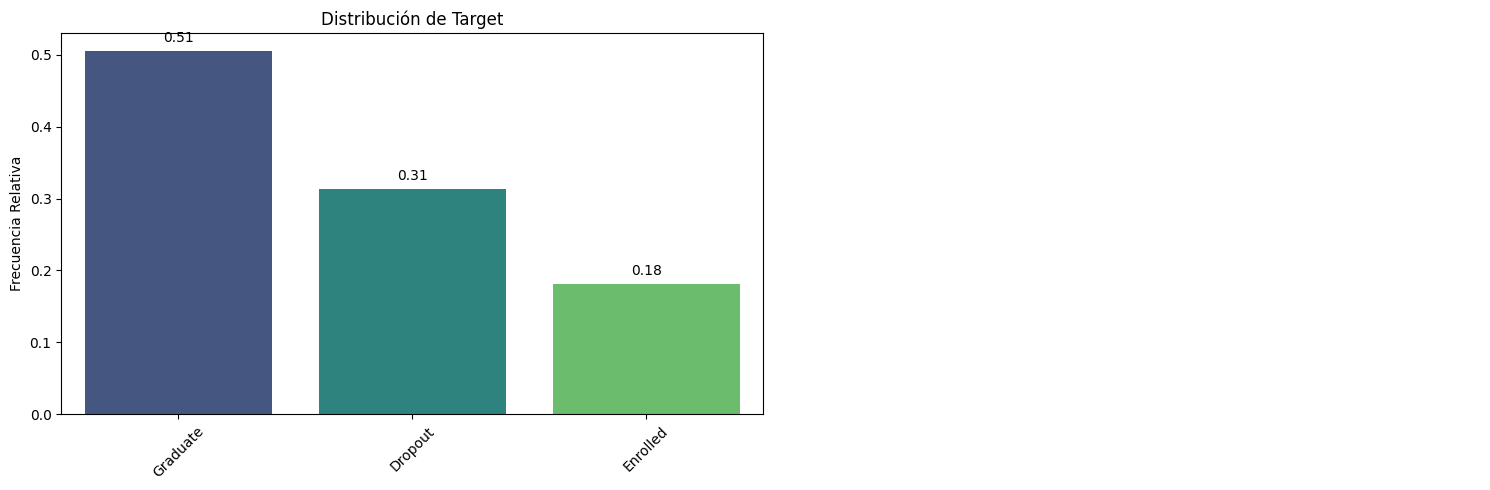

In [12]:
# Veo su distribución
target = 'Target'
bt.pinta_distribucion_categoricas(train_set, [target], relativa=True, mostrar_valores=True)

Como se observa, hay tres clases: graduado, abandono e inscrito. 

Existe un desbalanceo de la proporción, siendo la mitad de ellos graduados y la clase con menos predominio es inscrito.

Este desequilibrio lo tendré en cuenta a la hora de realizar la métrica y, además, de hacerle una transformación.

## Transformación de **Features** mediante **Pipeline**
### Variables numéricas
Realizaremos una transformación a las **variables numéricas** viendo, en primer lugar su distribución.

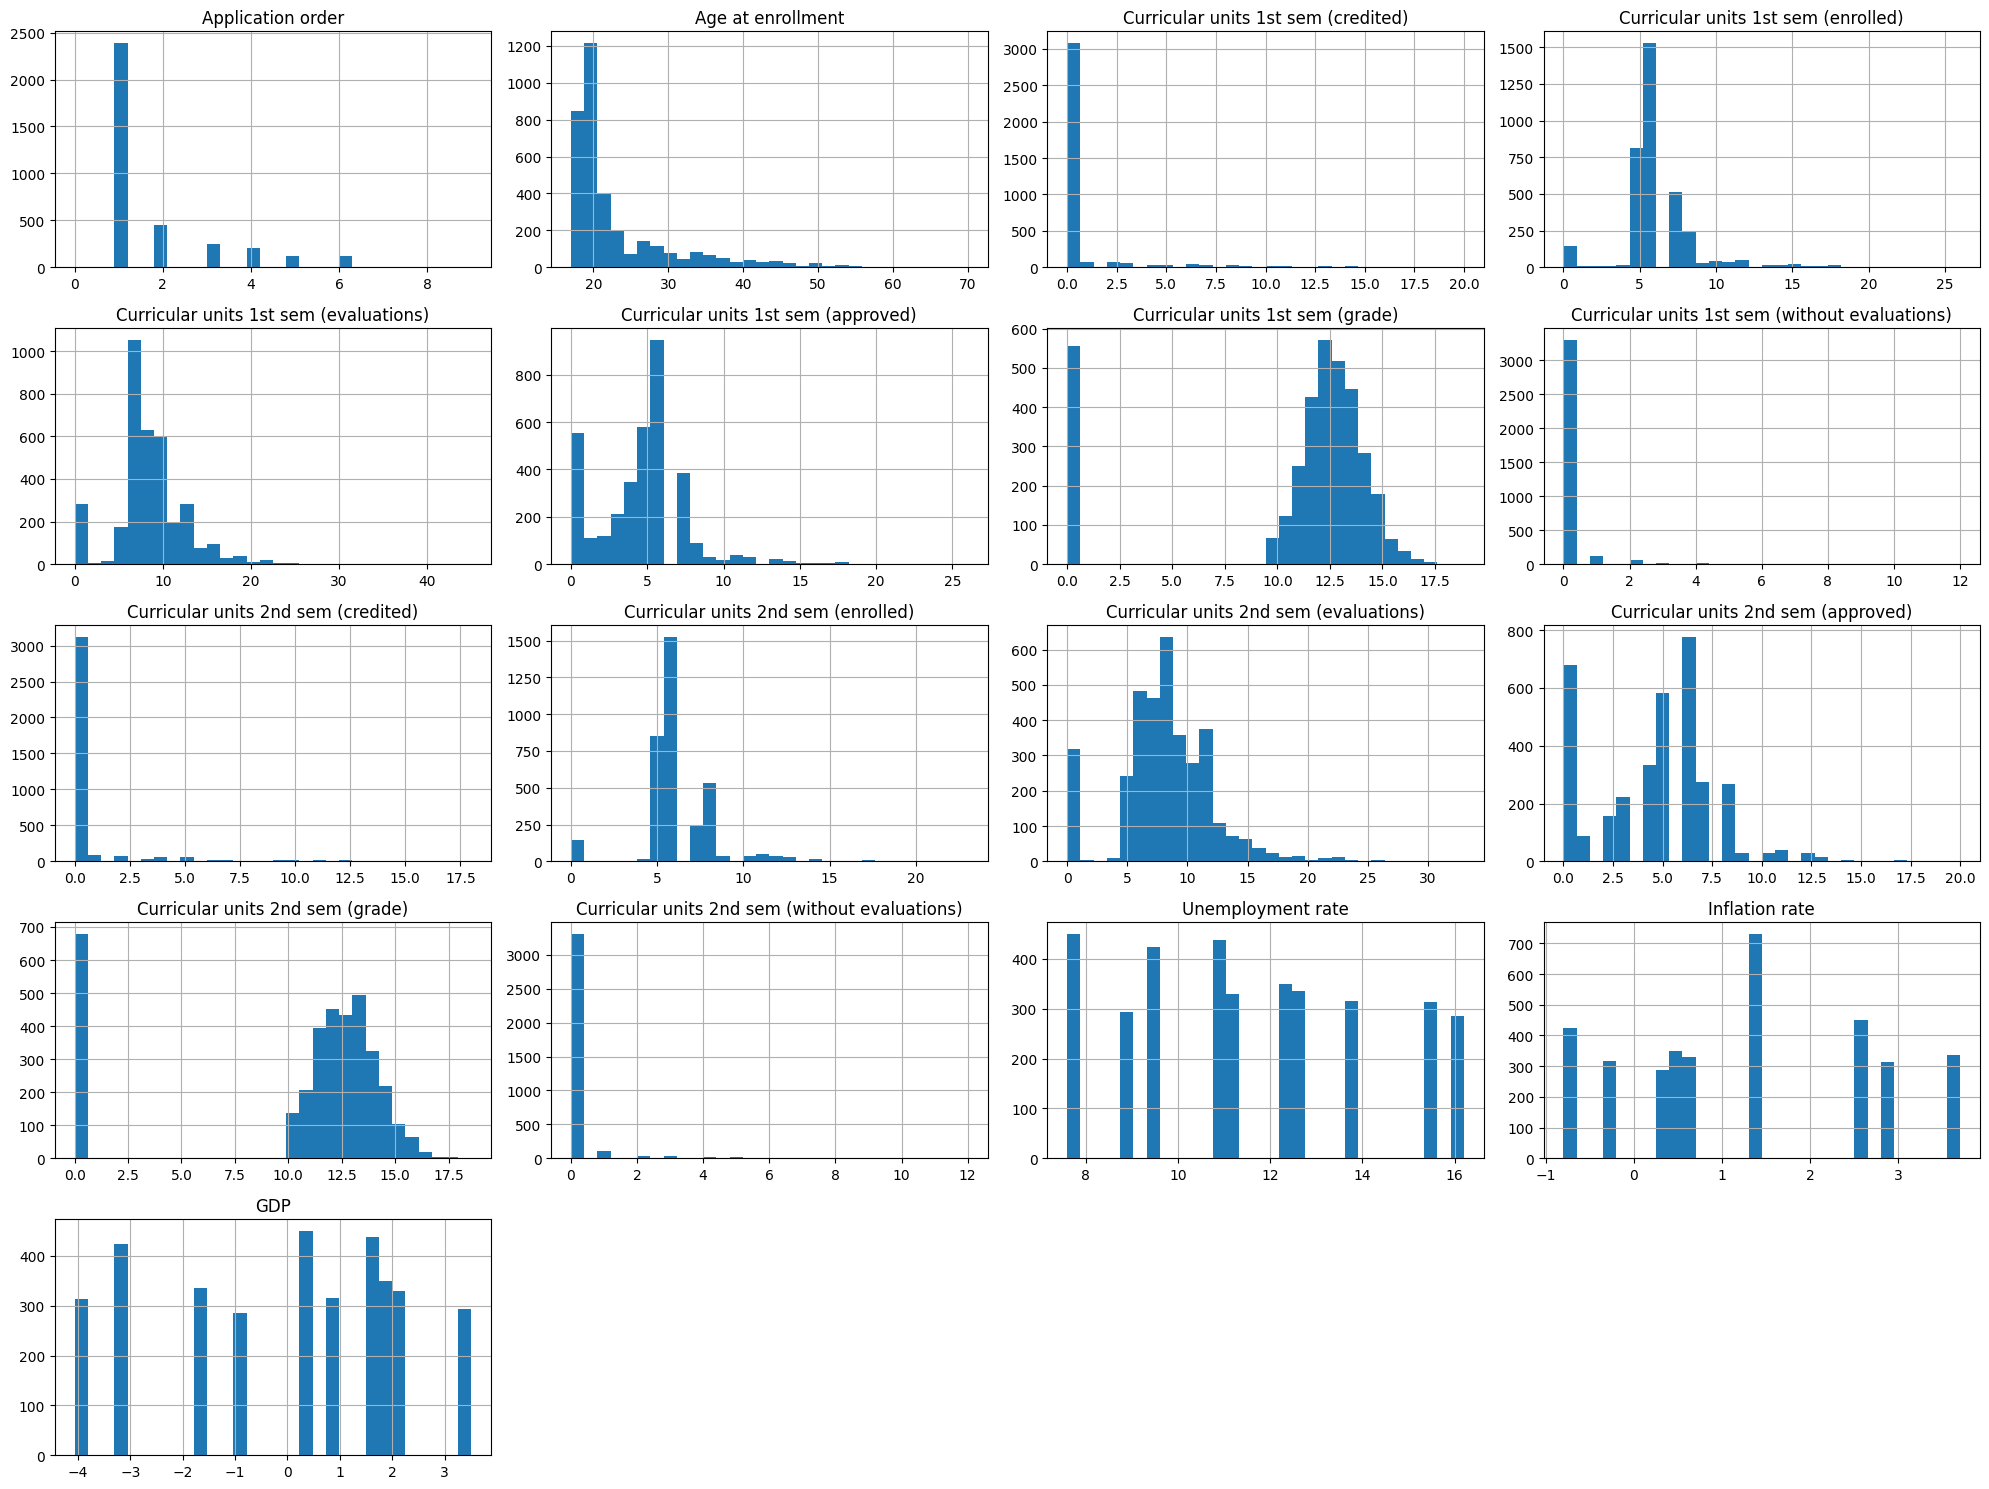

In [13]:
train_set[var_num].hist(figsize=(20,15), bins=30)
plt.tight_layout()
plt.show()

Observando las distintas distribuciones, aunque haya datos que tienen una forma "gausiana", hay valores que se acumulan en un único punto. También hay variables que van como a "saltos" pero no tienen una forma normal.

Por lo tanto, realizaremos una tranformación logarítmica a todas las variables numéricas teniendo en cuenta que hay valores negativos y 0s

Además de esta tranformación, escalaremos con un `StandardScaler()`.

In [14]:
pipe_num = Pipeline(
    [('log', FunctionTransformer(log_transform, validate=False, feature_names_out='one-to-one')),
     ('SScaler', StandardScaler())]
)

In [24]:
pipe_num

Pipeline(steps=[('log',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<function log_transform at 0x000001D0E23CB100>)),
                ('SScaler', StandardScaler())])

### Variables categóricas
En este caso, con algunas variables categóricas realizaremos un `OneHotEncoder()` para aquellas que no tengan un sentido ordinal, y para las que sí la tenga, un `OrdinalEncoder()` donde le daremos el orden específico por cada categoría.

In [15]:
# Instancio las variables donde quiero aplicar cada transformacion
one_cat = ['Marital status', 'Application mode', 'Course', 'Nacionality', 'Gender', "Mother's occupation", "Father's occupation"]
order_car = ['Previous qualification', "Mother's qualification", "Father's qualification"]

In [16]:
# Variables especificando el orden de cada categoría
categorias_student = [['Basic education 2nd cycle (6th/7th/8th year) or equivalent', 'Basic education 3rd cycle (9th/10th/11th year) or equivalent', '10th year of schooling—not completed', '10th year of schooling',\
                      '11th year of schooling—not completed', 'Other—11th year of schooling', '12th year of schooling—not completed', 'Secondary education', 'Technological specialization course', 'Professional higher technical course',\
                        'Frequency of higher education', 'Higher education—degree (1st cycle)', 'Higher education—bachelor’s degree', 'Higher education—degree', 'Higher education—master’s degree (2nd cycle)',\
                            'Higher education—master’s degree', 'Higher education—doctorate']]
categorias_father = [['Cannot read or write', 'Can read without having a 4th year of schooling', 'Basic education 1st cycle (4th/5th year) or equivalent', 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent', '7th year of schooling', '7th Year (Old)', '8th year of schooling',\
                     '9th Year of Schooling—not completed', '10th Year of Schooling', 'Other—11th Year of Schooling', '11th Year of Schooling—not completed', '12th Year of Schooling—not completed', 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',\
                     'Secondary Education—12th Year of Schooling or Equivalent', 'General Course of Administration and Commerce', '2nd year complementary high school course', 'Complementary High School Course',\
                        'Complementary High School Course—not concluded', '2nd cycle of the general high school course', 'Frequency of Higher Education', 'Higher education—degree (1st cycle)', 'Technological specialization course',\
                            'Technical-professional course', 'Professional higher technical course', 'Higher Education—bachelor’s degree', 'Higher Education—degree', 'Specialized higher studies course', 'Higher Education—master’s degree (2nd cycle)',\
                                'Higher Education—master’s degree', 'Higher Education—doctorate (3rd cycle)', 'Higher Education—doctorate', 'Supplementary Accounting and Administration', 'Unknown']]
categorias_mother = [['Cannot read or write', 'Can read without having a 4th year of schooling', 'Basic education 1st cycle (4th/5th year) or equivalent', 'Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent', '7th year of schooling', '7th Year (Old)', '8th year of schooling',\
                     '9th Year of Schooling—not completed', 'Other—11th Year of Schooling', '11th Year of Schooling—not completed', '12th Year of Schooling—not completed', 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent',\
                     'Secondary Education—12th Year of Schooling or Equivalent', 'General commerce course', 'General Course of Administration and Commerce', '2nd year complementary high school course', 'Complementary High School Course',\
                        'Complementary High School Course—not concluded', '2nd cycle of the general high school course', 'Frequency of Higher Education', 'Technical-professional course', 'Higher Education—bachelor’s degree', 'Higher Education—degree',\
                                'Higher Education—master’s degree', 'Higher Education—doctorate', 'Supplementary Accounting and Administration', 'Unknown']]

In [17]:
preprocessing = ColumnTransformer(
    [('Impute_numeric', pipe_num, var_num), # Añado el pipeline numérico
     ('One-hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), one_cat), # A partir de aquí añado las transformaciones categóricas # sparse_output=False para que me de una matriz densa y no dispersa
    ('Ordinal-student', OrdinalEncoder(categories=categorias_student), ['Previous qualification']),
    ('Ordinal-father', OrdinalEncoder(categories=categorias_father), ["Father's qualification"]),
    ('Ordinal-mother', OrdinalEncoder(categories=categorias_mother), ["Mother's qualification"])],
remainder='passthrough')

In [18]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Impute_numeric',
                                 Pipeline(steps=[('log',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_transform at 0x000001D0E23CB100>)),
                                                 ('SScaler',
                                                  StandardScaler())]),
                                 ['Application order', 'Age at enrollment',
                                  'Curricular units 1st sem (credited)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular uni...
                                                             'Course—not '
                                                             'concluded',
                                                             '2nd cycle of the '
                                                             'general high '
                                                             'school course',
                                                             'Frequency of '
                                                             'Higher Education',
                                                             'Technical-professional '
                                                             'course',
                                                             'Higher '
                                                             'Education—bachelor’s '
                                                             'degree',
                                                             'Higher '
                                                             'Education—degree',
                                                             'Higher '
                                                             'Education—master’s '
                                                             'degree',
                                                             'Higher '
                                                             'Education—doctorate',
                                                             'Supplementary '
                                                             'Accounting and '
                                                             'Administration',
                                                             'Unknown']]),
                                 ["Mother's qualification"])])

In [19]:
X_train_pipe = preprocessing.fit_transform(X_train)

In [20]:
print(X_train_pipe)

[[ 2.33803023 -0.75444976 -0.34454311 ...  1.          1.
   0.        ]
 [-0.60422629 -0.58127403 -0.34454311 ...  1.          0.
   0.        ]
 [-0.60422629 -0.2481905  -0.34454311 ...  1.          0.
   0.        ]
 ...
 [ 2.80172031  0.06863843 -0.34454311 ...  1.          0.
   0.        ]
 [-0.60422629 -0.08784396  1.26673194 ...  1.          0.
   0.        ]
 [-0.60422629 -0.75444976 -0.34454311 ...  1.          0.
   0.        ]]


In [21]:
# Creo el DF procesado
X_train_pipe_df = pd.DataFrame(X_train_pipe, columns=preprocessing.get_feature_names_out())
X_train_pipe_df.head()

,Impute_numeric__Application order,Impute_numeric__Age at enrollment,Impute_numeric__Curricular units 1st sem (credited),Impute_numeric__Curricular units 1st sem (enrolled),Impute_numeric__Curricular units 1st sem (evaluations),Impute_numeric__Curricular units 1st sem (approved),Impute_numeric__Curricular units 1st sem (grade),Impute_numeric__Curricular units 1st sem (without evaluations),Impute_numeric__Curricular units 2nd sem (credited),Impute_numeric__Curricular units 2nd sem (enrolled),...,Ordinal-student__Previous qualification,Ordinal-father__Father's qualification,Ordinal-mother__Mother's qualification,remainder__Daytime/evening attendance,remainder__Displaced,remainder__Educational special needs,remainder__Debtor,remainder__Tuition fees up to date,remainder__Scholarship holder,remainder__International
0,2.338030,-0.754450,-0.344543,0.395740,-0.051421,0.547284,0.424130,-0.237372,-0.32579,0.407561,...,7.0,3.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.604226,-0.581274,-0.344543,0.053607,-0.277483,0.547284,0.605757,-0.237372,-0.32579,0.053753,...,7.0,12.0,25.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,-0.604226,-0.248191,-0.344543,0.053607,-0.277483,0.547284,0.414701,-0.237372,-0.32579,0.053753,...,7.0,12.0,25.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.604226,-0.581274,-0.344543,0.395740,0.929012,0.304663,0.414701,-0.237372,-0.32579,0.724054,...,7.0,12.0,12.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.604226,-0.581274,-0.344543,0.053607,-0.277483,0.547284,0.535387,-0.237372,-0.32579,0.053753,...,7.0,12.0,13.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Voy a transformar el nombre de las columnas para que luego no de problemas en el entrenamiento
columns_proccesed = [col.replace('Impute_numeric__', '').replace('One-hot__', '').replace('Ordinal-student__','').replace('Ordinal-father__', '').replace('Ordinal-mother__','').replace('remainder__','') for col in X_train_pipe_df.columns]

In [23]:
X_train_pipe_df.columns = columns_proccesed
X_train_pipe_df.head()

,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),...,Previous qualification,Father's qualification,Mother's qualification,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,International
0,2.338030,-0.754450,-0.344543,0.395740,-0.051421,0.547284,0.424130,-0.237372,-0.32579,0.407561,...,7.0,3.0,13.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,-0.604226,-0.581274,-0.344543,0.053607,-0.277483,0.547284,0.605757,-0.237372,-0.32579,0.053753,...,7.0,12.0,25.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,-0.604226,-0.248191,-0.344543,0.053607,-0.277483,0.547284,0.414701,-0.237372,-0.32579,0.053753,...,7.0,12.0,25.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.604226,-0.581274,-0.344543,0.395740,0.929012,0.304663,0.414701,-0.237372,-0.32579,0.724054,...,7.0,12.0,12.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.604226,-0.581274,-0.344543,0.053607,-0.277483,0.547284,0.535387,-0.237372,-0.32579,0.053753,...,7.0,12.0,13.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
ruta = './data/processed/X_train_preprocessing.csv'
X_train_pipe_df.to_csv(ruta, index=False)